
# Project: Investigate a Dataset - [The Movie Database (TMDb) Data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 


I selected the 'The Movie Database(TMDb) Dataset'for this project.
This dataset has information about 10,000 movies collected from the Movie Database TMDb. The data set has 21 columns. From running the code ```pf.columns``` or ```pf.info();``` , here is a list of the columns, and their significance:

Data columns (total 21 columns):

| Column | Significance |
| :- | :- | 
| id | Each movie's unique identifier |                     
| imdb_id    |  Identifier in the Internet Movie Database        
popularity  |How popular the movie is            
budget     |Budget of the movie             
revenue     | Revenue generated from the movie            
original_title  |    The title of the movie    
cast      |   Actors/actresses featured in the movie           
homepage   |The link where you can find the movie
director   | Director of the movie             
tagline    | Desciption of the movie in a sentence            
keywords    | Words to use for easy searching of the movie        
overview   |   A short desciption of the movie          
runtime   | How long the movie is              
genres     |Categories defining the movies             
production_companies | The companies that produced the movie   
release_date   |The date the movie was released         
vote_count     |  Number of votes       
vote_average   | Average of the votes         
release_year   | The Year the movie was released         
budget_adj      |Budget of the associated movie in dollars      
revenue_adj   |Revenue of the associated movie in dollars



### Question(s) for Analysis

1. Do shorter movies receive more votes?
2. Which genres are most popular? Is their popularity associated with high revenue?
3. In which year was the most revenue generated? 
4. Which properties are common with the most profitable movies?
5. Is the number of votes a movie gets associated with high revenue?


In [1]:
# Importing the packages I will use in the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

  Using cached pandas-0.25.0.tar.gz (12.6 MB)
  Running setup.py clean for pandas
Failed to build pandas
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.2
    Uninstalling pandas-1.4.2:
      Successfully uninstalled pandas-1.4.2
    Running setup.py install for pandas: started
    Running setup.py install for pandas: still running...
    Running setup.py install for pandas: finished with status 'error'
  Rolling back uninstall of pandas
  Moving to c:\users\johnbrian\anaconda3\lib\site-packages\pandas-1.4.2.dist-info\
   from C:\Users\JohnBrian\anaconda3\Lib\site-packages\~.ndas-1.4.2.dist-info
  Moving to c:\users\johnbrian\anaconda3\lib\site-packages\pandas\
   from C:\Users\JohnBrian\anaconda3\Lib\site-packages\~.ndas


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\JohnBrian\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\JohnBrian\\AppData\\Local\\Temp\\pip-install-6u77ksi4\\pandas_d0abf9e27fe746fe8c22e07bd6af1ee4\\setup.py'"'"'; __file__='"'"'C:\\Users\\JohnBrian\\AppData\\Local\\Temp\\pip-install-6u77ksi4\\pandas_d0abf9e27fe746fe8c22e07bd6af1ee4\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\JohnBrian\AppData\Local\Temp\pip-wheel-svslku0e'
       cwd: C:\Users\JohnBrian\AppData\Local\Temp\pip-install-6u77ksi4\pandas_d0abf9e27fe746fe8c22e07bd6af1ee4\
  Complete output (909 lines):
  C:\Users\JohnBrian\AppData\Local\Temp\pip-install-6u77ksi4\pandas_d0abf9e27fe746fe8c22e07bd6af

<a id='wrangling'></a>
## Data Wrangling

### General Properties
Here, I'll check out the data to observe the general properties of the data. eg. number of columns and rows, descriptive statistics of some columns, count of missing data etc

In [3]:
#loading .csv file to a dataframe using pandas
df = pd.read_csv('tmdb-movies.csv')
#View of the data by printing a few lines
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
#Number of columns and rows in the original data
df.shape

(10866, 21)

In [5]:
#List of the columns in the original data
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [6]:
#Checking instances of missing values, datatypes, list of columns
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

The list above indicates the count of values missing in the columns. Alot of data is missing in the homepage column. The same case applies to keywords, tagline and overview columns. These will need to be dropped as I will not use them in the analysis.

In [7]:
#Checking the number of duplicated rows
df.duplicated().sum()

1

There is only one duplicated row.

In [8]:
#Checking the descriptive statistics of the data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


From the minimum, 25th and 50th percentile values, most values in the columns (budget, revenue, budget_adj, revenue_adj) seem to be zero.

In [9]:
#The data types of the various columns
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

Most of the data types are good to use. I will only change release_date to datetime datatype. imdb_id is a string but I won't require that column anyway.

In [10]:
#A summary of the information about the data
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       


### Data Cleaning

In this section, I will clean up the data by:

1)  Removing columns that I won't require

2) Removing duplicated rows

3) Changing some datatypes

4) Eliminating missing values

5) Removing the rows with zero values in budget and revenue columns
 

##### Step 1: Removing columns that I won't require

In [11]:

#1) Dropping columns I won't require
df.drop(['imdb_id','homepage', 'keywords', 'tagline', 'overview', 'revenue_adj', 'budget_adj'], axis=1, inplace=True)

I dropped the above columns as  some contain missing values and I will not require others in this analysis.

In [12]:
#View of the data to confirm dropped columns
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


Let's now drop the duplicated row

##### Step 2: Removing duplicated rows

In [13]:
#2) Removing the duplicated rows
df.drop_duplicates(inplace=True)

##### Step 3: Changing some datatypes

In [14]:
#3) Changing some data types: In this case, release_date to datetime
df.release_date = pd.to_datetime(df.release_date)

##### Step 4: Eliminating Missing Values

In [15]:
#4) Eliminating missing values
#Do we still have missing data?
df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

Seems that some data is still missing in the cast, director and production_companies columns. I will fill these values with the string 'Not Given' so that I can still keep the rows.

However, Genres is an important column in our analysis so I will drop the rows with missing genres.

In [16]:
#First Drop rows with missing values in genres column
df.genres.dropna(inplace=True)

In [17]:
#Then Fill the remaining missing values with string 'Not Given'
df.fillna('Not Given', inplace=True)

In [18]:
#Check that there are no more missing values
df.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
dtype: int64

The data is cleaner now. There are No missing values.

In [19]:
#View of the data so far
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015


##### Step 5: Removing the rows with zero values in budget and revenue columns

In [20]:
#5) Removing the rows with zero values in budget columns
#First, we get the value count of the zeros in the budget column
budget_zero_values = df['budget'] == 0
budget_zero_values.sum()

5696

In [21]:
#Then, the value count of the zeros in the revenue column
revenue_zero_values = df['revenue'] == 0
revenue_zero_values.sum()

6016

In [22]:
#Dropping these values
df.drop(df[budget_zero_values].index, inplace=True)
df.drop(df[revenue_zero_values].index, inplace=True)

C:\Users\JohnBrian\AppData\Local\Temp\ipykernel_9880\3369781714.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.drop(df[revenue_zero_values].index, inplace=True)


In [23]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,3854.000000,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3854.000000
mean,39888.185262,1.191554,3.720370e+07,1.076866e+08,109.220291,527.720291,6.168163,2001.261028
std,67222.527399,1.475162,4.220822e+07,1.765393e+08,19.922820,879.956821,0.794920,11.282575
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000
25%,6073.500000,0.462367,1.000000e+07,1.360003e+07,95.000000,71.000000,5.700000,1995.000000
50%,11321.500000,0.797511,2.400000e+07,4.480000e+07,106.000000,204.000000,6.200000,2004.000000
75%,38573.250000,1.368324,5.000000e+07,1.242125e+08,119.000000,580.000000,6.700000,2010.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000


In [24]:
#Checking that the steps above worked and that 
#there are no more zero values in the budget and revenue columns
budget_zero_values = df['budget'] == 0
budget_zero_values.sum()

0

In [25]:
revenue_zero_values = df['budget'] == 0
revenue_zero_values.sum()

0

Great! The data is now clean and ready for the Exploratory Data Analysis Step.

<a id='eda'></a>
## Exploratory Data Analysis
 With the goal of addressing the various research questions that I posed in the Introduction Section, I will run code to perform descriptive statics and create visualizations for the data. 



Using histograms, I will first look at the distribution of various properties of the data. Let's start with the revenue.

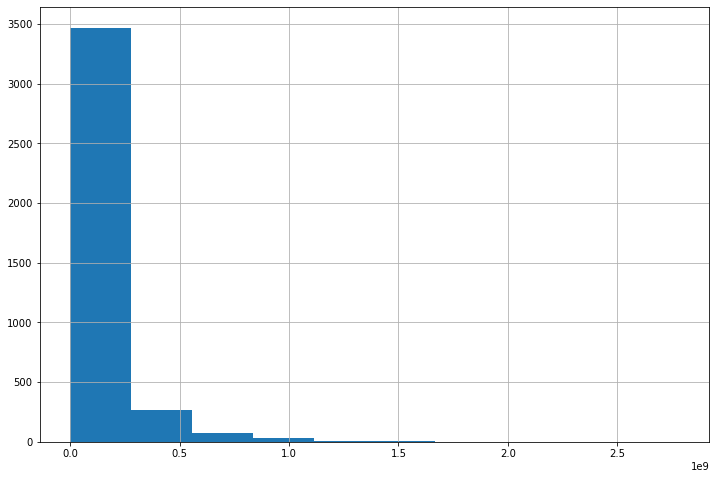

In [26]:
#A histogram on revenue
df.revenue.hist(figsize=(12,8));

The revenue is skewed to the right. This shows that most movies generated a low revenue.

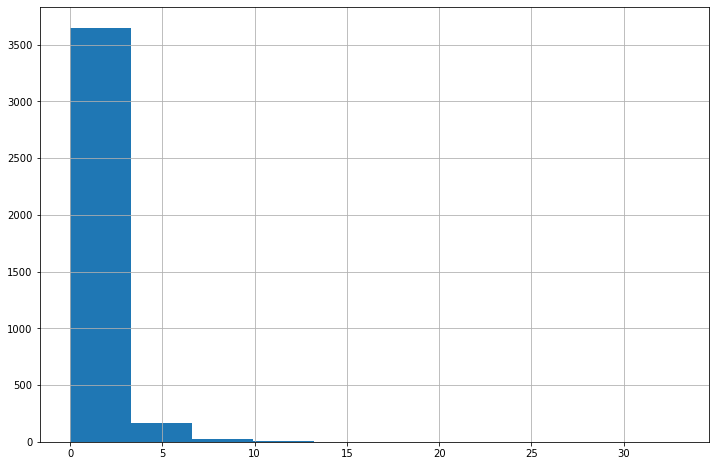

In [27]:
#A histogram on popularity
df.popularity.hist(figsize=(12,8));

This popularity distribution shows that few movies are popular.

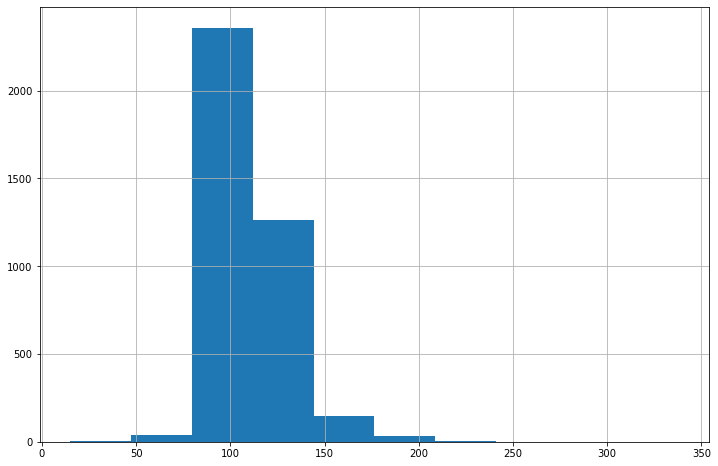

In [28]:
#A histogram on runtime
df.runtime.hist(figsize=(12,8));

The runtime is tending to a normal distribution. There is fairly a good number of long movies.

### Research Question 1: Do Shorter movies receive more votes?

We will investigate to check whether most people prefer shorter movies and therefore give more votes. 

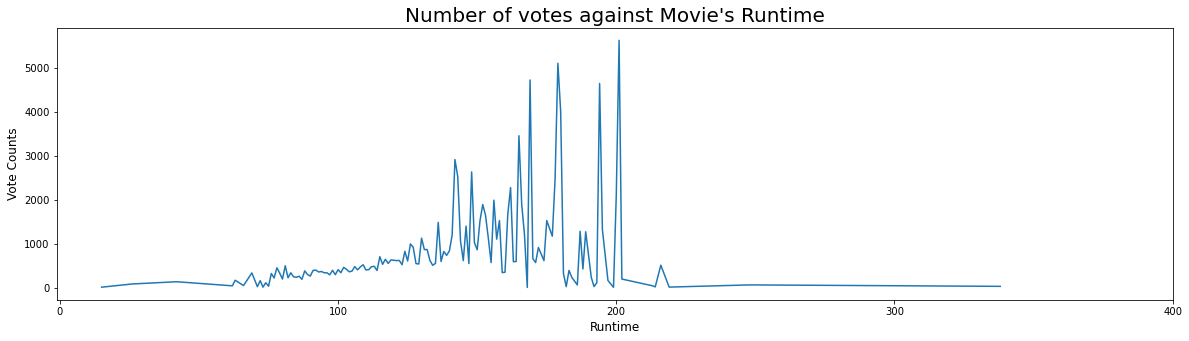

In [29]:
#To do that, I will group the data by runtime and compare that with the mean vote counts.
#Here is a graph comparing the two parameters
df.groupby('runtime')['vote_count'].mean().plot(xticks=np.arange(0,500,100), figsize=(20,5))
plt.xlabel('Runtime', fontsize=12)
plt.ylabel('Vote Counts', fontsize=12)
plt.title("Number of votes against Movie's Runtime", fontsize=20);


We have both short and long movies with very few votes. Viewers seem to prefer a moderate length of movie. Not too short and not too long.

### Research Question 2: Which genres are most popular? Is their popularity associated with high revenue?

In [30]:
#Mean popularity of the movies
popularity_mean = df.popularity.mean()
popularity_mean

1.1915540918526204

In [31]:
#I will now query to find the most popular movies
popular_movies = df.query("popularity >= {}".format(popularity_mean))

In [32]:
#This query is to find the less popular movies
less_popular_movies = df.query("popularity < {}".format(popularity_mean))

In [33]:
#number of unique genres in the popular movies category
popular_movies.genres.nunique()

509

In [34]:
#number of unique genres in the lesspopular movies category
less_popular_movies.genres.nunique()

788

In [35]:
#The genre with the most revenue among the popular movies
high_revenue_movie = popular_movies.groupby('genres')['revenue'].mean().max()
df[df.revenue == high_revenue_movie]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015


The movie 'Star Wars: The Force Awakens' generated the most revenue among the high revenue movies. It's genre is Action|Adventure|Science Fiction|Fantasy.

There's more to it: J.J Abrams directed the movie and it was released in 2015, one of the years when movies generated high revenues. It had quite a number of votes too.

In [36]:
#The genre with the maximum revenue among the less popular movies
low_revenue_movie = less_popular_movies.groupby('genres')['revenue'].mean().max()
df[df.revenue == low_revenue_movie]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
8094,1642,1.13661,22000000,1106279658,The Net,Sandra Bullock|Jeremy Northam|Dennis Miller|We...,Irwin Winkler,114,Crime|Drama|Mystery|Thriller|Action,Columbia Pictures,1995-07-28,201,5.6,1995


The Movie 'The Net' generated low revenue, but the most among the low revenue movies. It received few votes and a low popularity rating.

Further Observation: The maximum revenue in the less popular movies is lower compared to the maximum revenue in the popular movies. This shows the more popular a movie is, the more revenue it seems to generate. 

We will further investigate the properties of this movies using the profit column.

In [37]:
#A column 'profit' will be required at this point.
#This code is to add it by subtracting the budget used from revenue generated from a movie
#I changed the datatype ton integer for uniformity
df['profit'] = df['revenue'] - df['budget']
df['profit'].astype(int)

0        1363528810
1         228436354
2         185238201
3        1868178225
4        1316249360
            ...    
10822      26236689
10828      10000000
10829       1347000
10835       8000000
10848       6885000
Name: profit, Length: 3854, dtype: int32

### Research Question 3: In which year was the most revenue generated? 

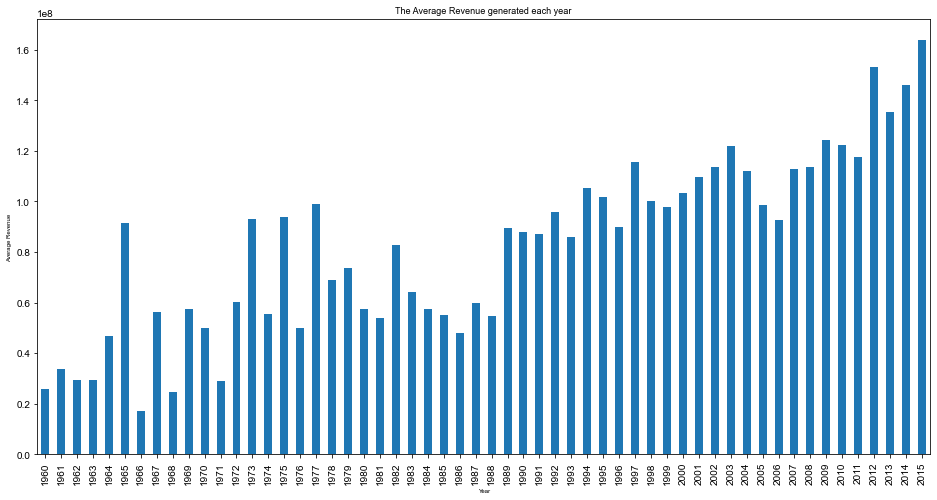

In [38]:
#Group the data by the years movies were released and plot a bar chart
df.groupby('release_year').revenue.mean().plot(x='Year', kind='bar', figsize=(16,8))

#Set the background dark
sns.set_style('darkgrid')

#Setting the title and axis labels of the graph
plt.title('The Average Revenue generated each year', fontsize=9)
plt.xlabel('Year', fontsize=6)
plt.ylabel('Average Revenue', fontsize=6);


Observation: Movies released in 2012 and 2015 generated the highest revenue. In general, movies realeased most recently have generated more revenue than those released some years back.

### Research Question 4: Which properties are common with the most profitable movies?

In [39]:
#Defining a function that will get the minimum and the maximum values 
#of movie properties, given a column
def get_min_max(column):
    #the minimum value
    min_value_index = df[column].idxmin()
    min_value = pd.DataFrame(df.loc[min_value_index])
    
    #the maximum value
    max_value_index = df[column].idxmax()
    max_value = pd.DataFrame(df.loc[max_value_index])
    
    #this function returns both the minimum and the maximum value
    return pd.concat([min_value, max_value], axis=1)

In [40]:
#Call the function to get movies with the lowest and highest profits
get_min_max('profit')

,2244,1386
id,46528,19995
popularity,0.25054,9.432768
budget,425000000,237000000
revenue,11087569,2781505847
original_title,The Warrior's Way,Avatar
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director,Sngmoo Lee,James Cameron
runtime,100,162
genres,Adventure|Fantasy|Action|Western|Thriller,Action|Adventure|Fantasy|Science Fiction
production_companies,Boram Entertainment Inc.,Ingenious Film Partners|Twentieth Century Fox ...


The movie that generated the most profit is 'Avatar'. It is fairly long as compared to the least profitable movie. It also received a fairly high vote count as compared to 'The Warrior's Day'. 
It was clearly more popular which could have been the reason it made such high profits.

In [41]:
#Call the function to get movies with the fewest and most votes
get_min_max('vote_count')


,1818,1919
id,21033,27205
popularity,0.159638,9.363643
budget,1500000,160000000
revenue,56000,825500000
original_title,Beautiful,Inception
cast,Deborra-Lee Furness|Peta Wilson|Aaron Jeffery|...,Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen P...
director,Dean O'Flaherty,Christopher Nolan
runtime,97,148
genres,Drama|Mystery|Thriller,Action|Thriller|Science Fiction|Mystery|Adventure
production_companies,Kojo Pictures,Legendary Pictures|Warner Bros.|Syncopy


In [42]:
#Call the function to get movies that are the least and most popular
get_min_max('popularity')

,7268,0
id,1392,135397
popularity,0.001117,32.985763
budget,350000,150000000
revenue,3515061,1513528810
original_title,Born into Brothels,Jurassic World
cast,Zana Briski|Avijit|Geeta Masi|Kochi|Mamuni,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
director,Zana Briski|Ross Kauffman,Colin Trevorrow
runtime,85,124
genres,Documentary,Action|Adventure|Science Fiction|Thriller
production_companies,Not Given,Universal Studios|Amblin Entertainment|Legenda...


Further investigation of the data:

In [43]:
#To find the high revenue movies, I'll first get the mean revenue
revenue_mean = df.revenue.mean()

#Using query to get the movies with revenues more than the mean revenue
high_revenue_movies = df.query('revenue > {}'.format(revenue_mean))

#A description of the high revenue movies
#Which properties are common with these movies?
high_revenue_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,profit
count,1107.000000,1107.000000,1.107000e+03,1.107000e+03,1107.000000,1107.000000,1107.000000,1107.000000,1.107000e+03
mean,36205.942186,2.191528,7.426524e+07,2.934396e+08,115.581752,1242.360434,6.393225,2003.282746,2.191744e+08
std,61897.463248,2.213379,5.448290e+07,2.407357e+08,21.111119,1280.878310,0.707081,9.471500,2.141080e+08
min,11.000000,0.131526,1.130000e+02,1.078795e+08,72.000000,14.000000,4.200000,1961.000000,-3.042188e+07
25%,1628.500000,1.072666,3.400000e+07,1.492763e+08,100.000000,388.000000,5.900000,1998.000000,9.880432e+07
50%,9488.000000,1.615244,6.000000e+07,2.100000e+08,113.000000,781.000000,6.400000,2005.000000,1.484276e+08
75%,44131.000000,2.559995,1.000000e+08,3.473800e+08,128.000000,1643.000000,6.900000,2011.000000,2.590099e+08
max,417859.000000,32.985763,3.800000e+08,2.781506e+09,201.000000,9767.000000,8.300000,2015.000000,2.544506e+09


From the description above, high revenue movies are very popular. They also seem to be very profitable since the maximum budget is lower than the mean budget. They are moderately long and they received a high count of votes as well.

### Research Question 5 : Is the number of votes a movie gets associated with high revenue?

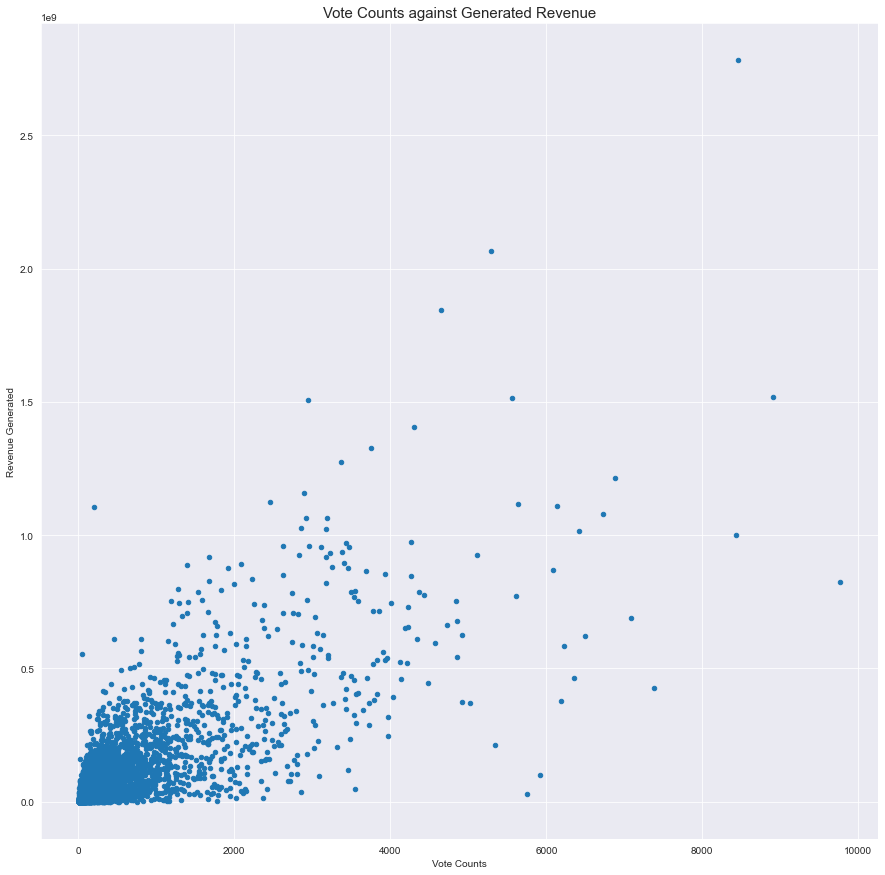

In [44]:
df.plot(x='vote_count', y='revenue', kind='scatter', figsize=(15,15))
plt.title('Vote Counts against Generated Revenue', fontsize=15)
plt.xlabel('Vote Counts', fontsize=10)
plt.ylabel('Revenue Generated', fontsize=10);


More votes for a movie doesn't necesarilly translate to high revenues genrated from the movie. From the scatter plot above, a lot of votes were scattered for movies that did not generate so much revenue.

<a id='conclusions'></a>
## Conclusions

###### Results
Our data suggests: 
1. Viewers like moderately long movies. Not too short and not too long. 
2. Popular movies generate high revenues. The movie that made the most profit is very popular while the one that made losses is not.
3. Movies released in 2012 and 2015 generated the highest revenue. In general, movies realeased most recently have generated more revenue than those released some years back.
4. The movie that generated the most profit is 'Avatar'. It is fairly long as compared to the least profitable movie. It also received a fairly high vote count as compared to 'The Warrior's Day'. It was clearly more popular which could have been the reason it made such high profits.
5. The revenue is not necessarily associated to the number of votes a movie gets.


###### Limitations
A lot of values in the budget and revenue columns were zero. This might have been caused by lack of this information for those rows. It is inaccurate that zero budget or zero revenue was made for a movie. I had to drop these rows as it would have resulted to incorrect analysis. 
To avoid losing such huge amounts of data, correct values for those columns would help.

I was not able to make any analysis using the cast column since this data was separated by '|'. This made it difficult to extract the names of the cast and therefore analyse.

There are more questions I would ask and answer by analyzing the dataset, with more time.



In [45]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1